***Title : Bank Customer Churn Model***

***Objective : The objective of the Bank Customer Churn Model project is to predict whether a customer will leave the bank or not, utilizing various parameters.***

***Data Source: https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv***

In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
df.duplicated('CustomerId').sum()

0

In [5]:
df=df.set_index('CustomerId')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


In [7]:
df.describe()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [9]:
df.isnull().sum()

Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

***Data Preprocessing: Encoding***

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}},inplace=True)

In [12]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [13]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)

In [14]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [15]:
df.replace({'Num Of Products':{1:0,2:1,3:1,4:1}},inplace=True)

In [16]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [17]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [18]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

In [19]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<AxesSubplot:>

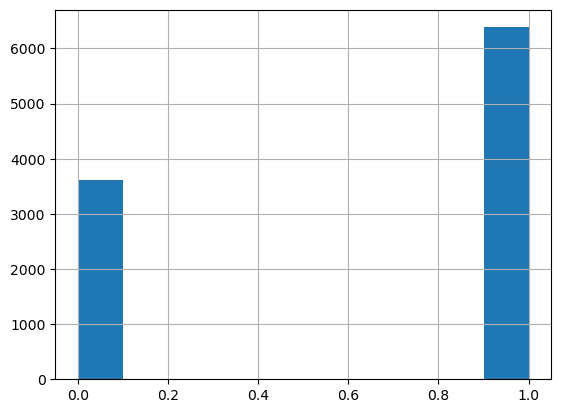

In [20]:
df['Zero Balance'].hist()

In [21]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

***Define Label and Features***

In [22]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

***Define Target Variable (y) and Feature Variables (X)***

In [23]:
x=df.drop(['Surname','Churn'],axis=1)

In [24]:
y=df['Churn']

In [25]:
x.shape,y.shape

((10000, 11), (10000,))

In [26]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

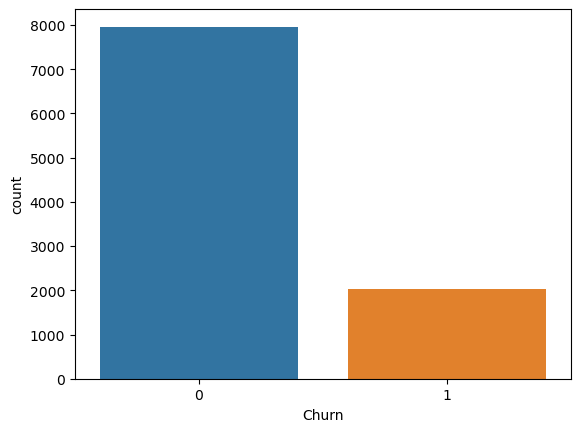

In [27]:
sns.countplot(x='Churn',data=df)

In [31]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


***Random Under Sampling***

In [30]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
rs=RandomUnderSampler(random_state=2529)

In [33]:
x_rs,y_rs=rs.fit_resample(x,y)

In [34]:
x_rs.shape,y_rs.shape,x.shape,y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [35]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [36]:
y_rs.value_counts()

0    2037
1    2037
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

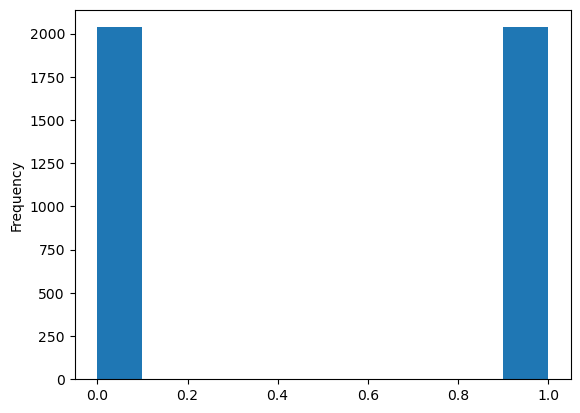

In [37]:
y_rs.plot(kind='hist')

In [38]:
from imblearn.over_sampling import RandomOverSampler

In [39]:
ro=RandomOverSampler(random_state=2529)

In [40]:
x_ro,y_ro=ro.fit_resample(x,y)

In [41]:
x_ro.shape,y_ro.shape,x.shape,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [42]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [43]:
y_ro.value_counts()

1    7963
0    7963
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

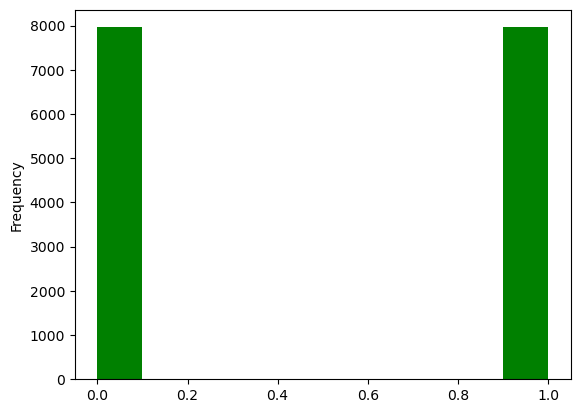

In [44]:
y_ro.plot(kind='hist', color='green')

***Train Test Split***

In [45]:
from sklearn.model_selection import train_test_split

***Split Original Data***

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

***Split Random Under Sample Data***

In [47]:
x_train_rs,x_test_rs,y_train_rs,y_test_rs=train_test_split(x_rs,y_rs,test_size=0.3,random_state=25)

***Split Random Over Sample Data***

In [48]:
x_train_ro,x_test_ro,y_train_ro,y_test_ro=train_test_split(x_ro,y_ro,test_size=0.3,random_state=25)

***Standardize Original Data***

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

***Standardize Original Data***

In [51]:
x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [52]:
x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

***Standardize Random Under Sample Data***

In [53]:
x_train_rs[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_rs[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [54]:
x_test_rs[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_rs[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

***Standardize Random Over Sample Data***

In [55]:
x_train_ro[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_train_ro[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [56]:
x_test_ro[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(x_test_ro[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

***Support Vector Machine Classifier***

In [57]:
from sklearn.svm import SVC

In [58]:
svc=SVC()

In [59]:
svc.fit(x_train,y_train)

SVC()

In [60]:
y_pred=svc.predict(x_test)

***Model Accuracy***

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

In [62]:
confusion_matrix(y_test,y_pred)

array([[2374,   45],
       [ 421,  160]], dtype=int64)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid={'C':[0.1,1,1.0],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [66]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   2.0s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.3s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 1.0], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [67]:
print(grid.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=1)


In [68]:
grid_predictions=grid.predict(x_test)

In [69]:
confusion_matrix(y_test,grid_predictions)

array([[2019,  400],
       [ 258,  323]], dtype=int64)

In [70]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2419
           1       0.45      0.56      0.50       581

    accuracy                           0.78      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.80      0.78      0.79      3000



***Model With Random Under Sampling***

In [71]:
svc_rs=SVC()

In [72]:
svc_rs.fit(x_train_rs,y_train_rs)

SVC()

In [73]:
y_pred_rs=svc_rs.predict(x_test_rs)

***Model Accuracy***

In [74]:
confusion_matrix(y_test_rs,y_pred_rs)

array([[483, 120],
       [172, 448]], dtype=int64)

In [75]:
print(classification_report(y_test_rs,y_pred_rs))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       603
           1       0.79      0.72      0.75       620

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



***Hyperparameter Tunning***

In [76]:
param_grid={'C':[0.1,1,1.0],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [77]:
grid_rs=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_rs.fit(x_train_rs,y_train_rs)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 1.0], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [78]:
print(grid_rs.best_estimator_)

SVC(C=0.1, class_weight='balanced', gamma=0.1)


In [79]:
grid_predictions_rs=grid_rs.predict(x_test_rs)

In [80]:
confusion_matrix(y_test_rs,grid_predictions_rs)

array([[458, 145],
       [178, 442]], dtype=int64)

In [81]:
print(classification_report(y_test_rs,grid_predictions_rs))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       603
           1       0.75      0.71      0.73       620

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



***Model With Random Over Sampling***

In [82]:
svc_ro=SVC()

In [83]:
svc_ro.fit(x_train_ro,y_train_ro)

SVC()

In [84]:
y_pred_ro=svc_ro.predict(x_test_ro)

***Model Accuracy***

In [85]:
confusion_matrix(y_test_ro,y_pred_ro)

array([[1854,  572],
       [ 551, 1801]], dtype=int64)

In [86]:
print(classification_report(y_test_ro,y_pred_ro))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778



***Hyperparameter Tunning***

In [87]:
param_grid={'C':[0.1,1,1.0],
            'gamma':[1,0.1,0.01],
            'kernel':['rbf'],
            'class_weight':['balanced']}

In [88]:
grid_ro=GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=2)
grid_ro.fit(x_train_ro,y_train_ro)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.5s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   5.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   5.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.7s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 1.0], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [89]:
print(grid_ro.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


In [90]:
grid_predictions_ro=grid_ro.predict(x_test_ro)

In [91]:
confusion_matrix(y_test_ro,grid_predictions_ro)

array([[2077,  349],
       [ 190, 2162]], dtype=int64)

In [92]:
print(classification_report(y_test_ro,grid_predictions_ro))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2426
           1       0.86      0.92      0.89      2352

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



In [94]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2419
           1       0.45      0.56      0.50       581

    accuracy                           0.78      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.80      0.78      0.79      3000



In [95]:
print(classification_report(y_test_rs,y_pred_rs))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       603
           1       0.79      0.72      0.75       620

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



In [96]:
print(classification_report(y_test_rs,grid_predictions_rs))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       603
           1       0.75      0.71      0.73       620

    accuracy                           0.74      1223
   macro avg       0.74      0.74      0.74      1223
weighted avg       0.74      0.74      0.74      1223



In [97]:
print(classification_report(y_test_ro,y_pred_ro))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2426
           1       0.76      0.77      0.76      2352

    accuracy                           0.76      4778
   macro avg       0.76      0.76      0.76      4778
weighted avg       0.77      0.76      0.76      4778



In [98]:
print(classification_report(y_test_ro,grid_predictions_ro)) # More Accuracy

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2426
           1       0.86      0.92      0.89      2352

    accuracy                           0.89      4778
   macro avg       0.89      0.89      0.89      4778
weighted avg       0.89      0.89      0.89      4778



***Logistic Regression***

In [99]:
from sklearn.linear_model import LogisticRegression

***Model With Original Data***

In [100]:
classifier = LogisticRegression(random_state=42)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [101]:
y_pred = classifier.predict(x_test)

In [102]:
confusion_matrix(y_test, y_pred)

array([[2331,   88],
       [ 450,  131]], dtype=int64)

In [103]:
print(classification_report(y_test, y_pred)) # More Accuracy

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2419
           1       0.60      0.23      0.33       581

    accuracy                           0.82      3000
   macro avg       0.72      0.59      0.61      3000
weighted avg       0.79      0.82      0.79      3000



***Model With Random Under Sample Data***

In [104]:
classifier_rs = LogisticRegression(random_state=42)
classifier_rs.fit(x_train_rs, y_train_rs)

LogisticRegression(random_state=42)

In [105]:
y_pred_rs = classifier_rs.predict(x_test_rs)

In [106]:
confusion_matrix(y_test_rs, y_pred_rs)

array([[446, 157],
       [172, 448]], dtype=int64)

In [107]:
print(classification_report(y_test_rs, y_pred_rs))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       603
           1       0.74      0.72      0.73       620

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



***Model With Random Over Sample Data***

In [108]:
classifier_ro = LogisticRegression(random_state=42)
classifier_ro.fit(x_train_ro, y_train_ro)

LogisticRegression(random_state=42)

In [109]:
y_pred_ro = classifier_ro.predict(x_test_ro)

In [110]:
confusion_matrix(y_test_ro, y_pred_ro)

array([[1727,  699],
       [ 690, 1662]], dtype=int64)

In [111]:
print(classification_report(y_test_ro, y_pred_ro))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      2426
           1       0.70      0.71      0.71      2352

    accuracy                           0.71      4778
   macro avg       0.71      0.71      0.71      4778
weighted avg       0.71      0.71      0.71      4778



***Decision Tree Classifier***

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [114]:
y_pred = classifier.predict(x_test)

In [115]:
confusion_matrix(y_test, y_pred)

array([[2043,  376],
       [ 337,  244]], dtype=int64)

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2419
           1       0.39      0.42      0.41       581

    accuracy                           0.76      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.77      0.76      0.77      3000



***Model With Random Under Sample Data***

In [117]:
classifier_rs = DecisionTreeClassifier(random_state=42)
classifier_rs.fit(x_train_rs, y_train_rs)
y_pred_rs = classifier_rs.predict(x_test_rs)

In [118]:
confusion_matrix(y_test_rs, y_pred_rs)

array([[393, 210],
       [209, 411]], dtype=int64)

In [119]:
print(classification_report(y_test_rs, y_pred_rs))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65       603
           1       0.66      0.66      0.66       620

    accuracy                           0.66      1223
   macro avg       0.66      0.66      0.66      1223
weighted avg       0.66      0.66      0.66      1223



***Model With Random Over Sample Data***

In [120]:
classifier_ro = DecisionTreeClassifier(random_state=42)
classifier_ro.fit(x_train_ro, y_train_ro)
y_pred_ro = classifier_ro.predict(x_test_ro)

In [121]:
confusion_matrix(y_test_ro, y_pred_ro)

array([[1978,  448],
       [ 237, 2115]], dtype=int64)

In [122]:
print(classification_report(y_test_ro, y_pred_ro)) # High Accuracy

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      2426
           1       0.83      0.90      0.86      2352

    accuracy                           0.86      4778
   macro avg       0.86      0.86      0.86      4778
weighted avg       0.86      0.86      0.86      4778



***Random Forest Classifier***

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
y_pred = classifier.predict(x_test)

In [126]:
confusion_matrix(y_test, y_pred)

array([[2328,   91],
       [ 369,  212]], dtype=int64)

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2419
           1       0.70      0.36      0.48       581

    accuracy                           0.85      3000
   macro avg       0.78      0.66      0.69      3000
weighted avg       0.83      0.85      0.83      3000



***Model With Random Under Sample Data***

In [128]:
classifier_rs = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rs.fit(x_train_rs, y_train_rs)
y_pred_rs = classifier_rs.predict(x_test_rs)

In [129]:
confusion_matrix(y_test_rs, y_pred_rs)

array([[463, 140],
       [172, 448]], dtype=int64)

In [130]:
print(classification_report(y_test_rs, y_pred_rs))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       603
           1       0.76      0.72      0.74       620

    accuracy                           0.74      1223
   macro avg       0.75      0.75      0.74      1223
weighted avg       0.75      0.74      0.74      1223



***Model With Random Over Sample Data***

In [131]:
classifier_ro = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_ro.fit(x_train_ro, y_train_ro)
y_pred_ro = classifier_ro.predict(x_test_ro)

In [132]:
confusion_matrix(y_test_ro, y_pred_ro)

array([[2175,  251],
       [  53, 2299]], dtype=int64)

In [133]:
print(classification_report(y_test_ro, y_pred_ro)) # High Accuracy

              precision    recall  f1-score   support

           0       0.98      0.90      0.93      2426
           1       0.90      0.98      0.94      2352

    accuracy                           0.94      4778
   macro avg       0.94      0.94      0.94      4778
weighted avg       0.94      0.94      0.94      4778



In [134]:
results_high_accuracy_models={'SVM':89,'LogisticRegression':82,'DecisionTreeClassifier':86,'RandomForestClassifier':94}

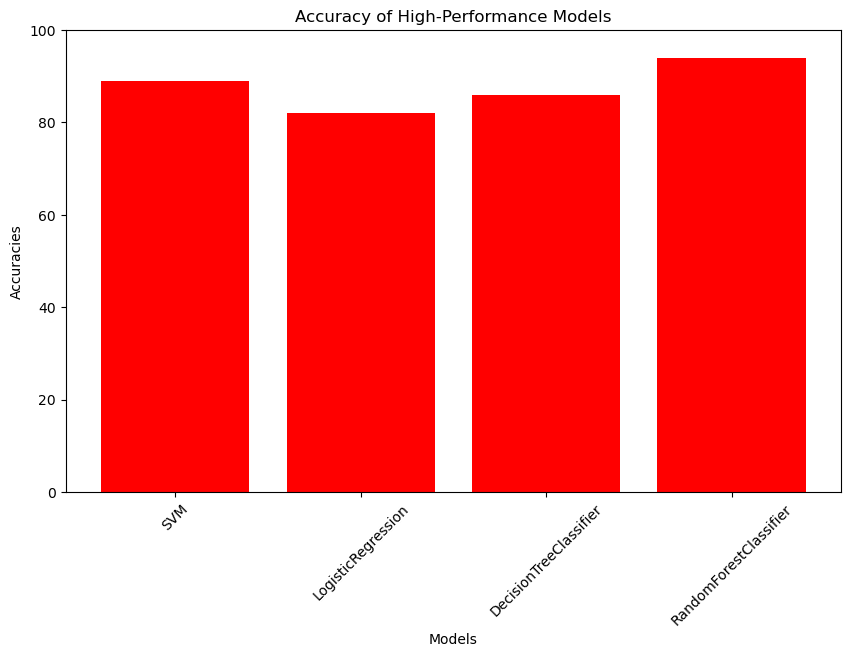

In [135]:
model_names = list(results_high_accuracy_models.keys())
accuracies = list(results_high_accuracy_models.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='red')
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.title('Accuracy of High-Performance Models')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.show()

***Based on the accuracies and considering both Type 1 and Type 2 errors, the Random Forest classifier emerges as the most suitable model for this dataset.***